In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm

In [2]:
model = load_model(r'C:\Users\shash\Desktop\emotion-detector\emotion2_model.keras')
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,90

 Total params: 13,024,023 (49.68 MB)

 Trainable params: 4,340,359 (16.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

 Optimizer params: 8,680,720 (33.11 MB)

In [20]:
img_path=r"C:\Users\shash\Desktop\emotion-detector\test\happy\PrivateTest_218533.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48,48))
img = img/255.0
img = np.expand_dims(img, axis=(0, -1))

In [21]:
layer_name = 'conv2d_1'
intermediate_layer_model = Model(inputs=model.input, outputs = model.get_layer(layer_name).output)
activation_maps = intermediate_layer_model.predict(img)
print("Activationmaos shape:", activation_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Activationmaos shape: (1, 24, 24, 128)
Activationmaos shape: (1, 24, 24, 128)


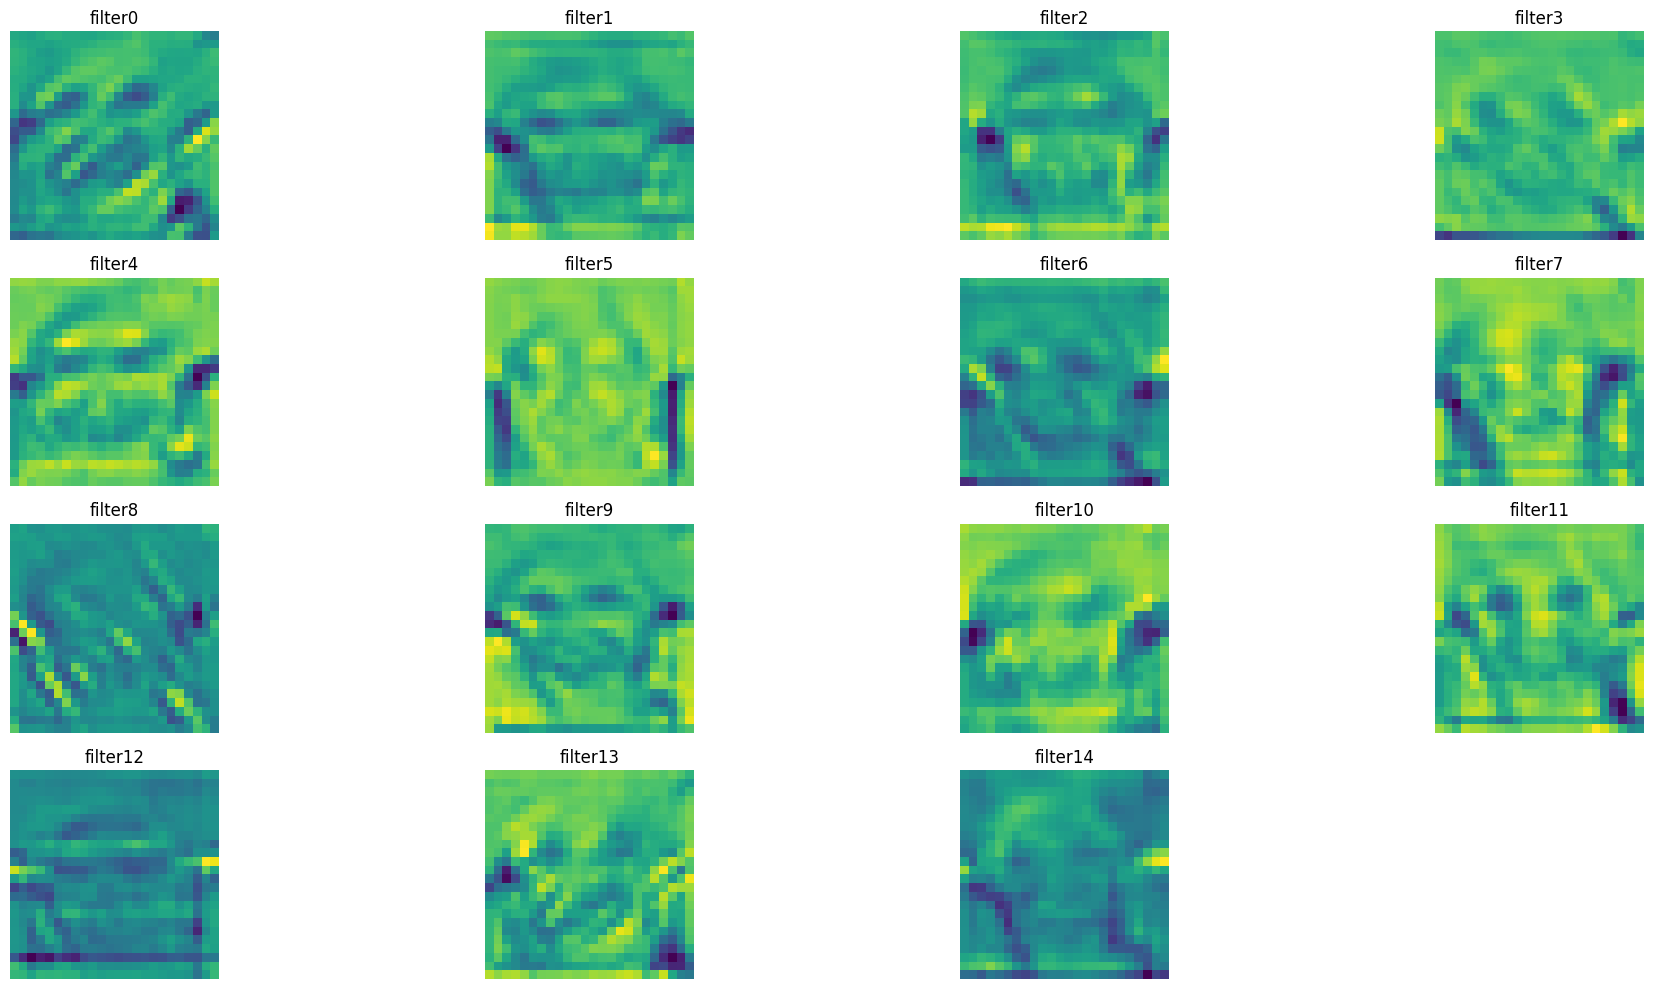

In [22]:
n_filters = activation_maps.shape[-1]

plt.figure(figsize=(20,10))
for i in range(min(15,n_filters)):
    plt.subplot(4,4, i+1)
    plt.imshow(activation_maps[0,:,:,i], cmap='viridis')
    plt.title(f'filter{i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Visualize Deeper Layer Activations and Grad-CAM



Convolutional layers: ['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']
Visualizing activations from: conv2d_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Activation maps shape (deeper layer): (1, 6, 6, 512)
Activation maps shape (deeper layer): (1, 6, 6, 512)


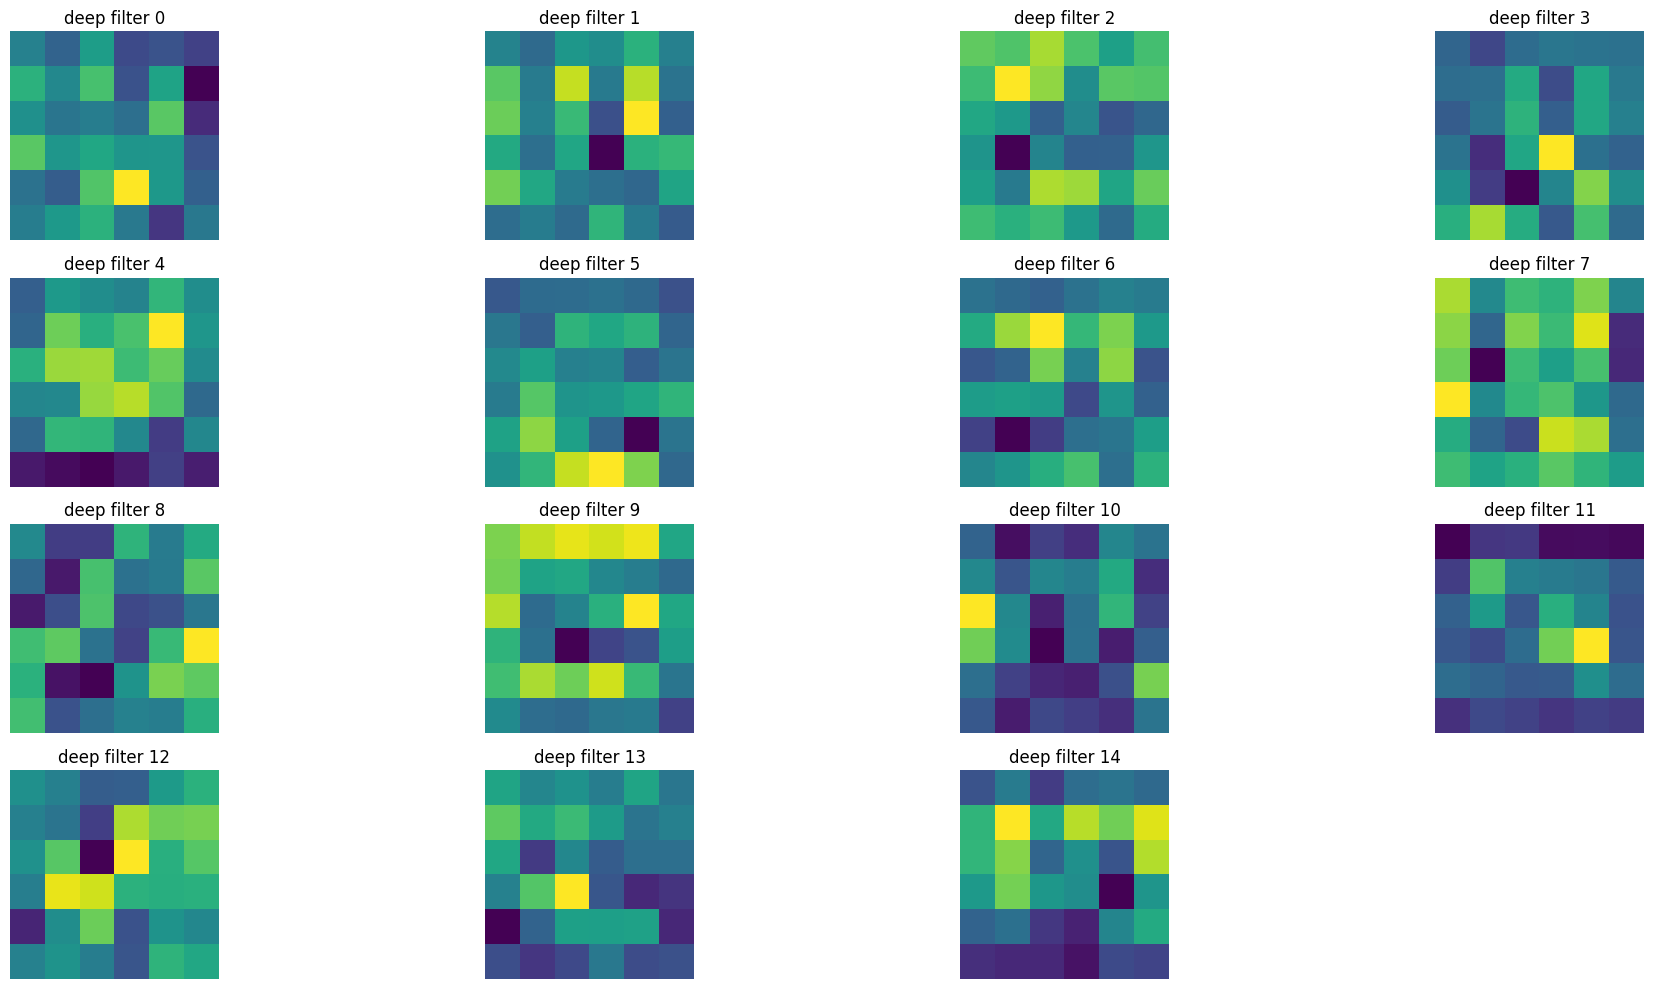

In [23]:
# Visualizing deeper convolutional layers
conv_layers = [layer.name for layer in model.layers if 'conv' in layer.name]
print('Convolutional layers:', conv_layers)

# Choose the last conv layer
last_conv_layer_name = conv_layers[-1]
print('Visualizing activations from:', last_conv_layer_name)

intermediate_layer_model_deep = Model(inputs=model.input, outputs=model.get_layer(last_conv_layer_name).output)
activation_maps_deep = intermediate_layer_model_deep.predict(img)
print('Activation maps shape (deeper layer):', activation_maps_deep.shape)

n_filters_deep = activation_maps_deep.shape[-1]
plt.figure(figsize=(20,10))
for i in range(min(15, n_filters_deep)):
    plt.subplot(4,4, i+1)
    plt.imshow(activation_maps_deep[0,:,:,i], cmap='viridis')
    plt.title(f'deep filter {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

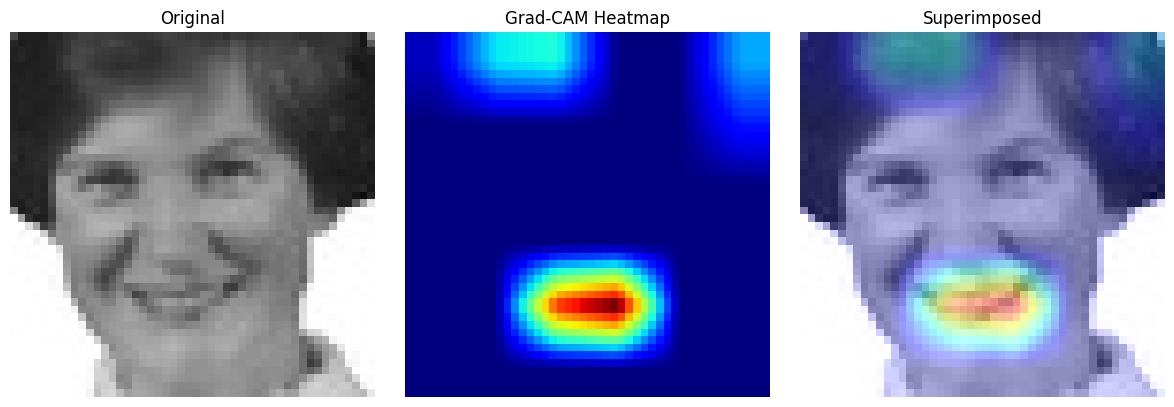

In [24]:
# Grad-CAM implementation for model interpretability
import tensorflow as tf
import matplotlib.cm as cm

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Compute Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap over original image
img_orig = cv2.imread(img_path)
img_orig = cv2.resize(img_orig, (48,48))
heatmap_resized = cv2.resize(heatmap, (img_orig.shape[1], img_orig.shape[0]))
heatmap_colored = cm.jet(heatmap_resized)[:,:,:3]
superimposed_img = heatmap_colored * 0.4 + img_orig/255.0

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Grad-CAM Heatmap')
plt.imshow(heatmap_resized, cmap='jet')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Superimposed')
plt.imshow(np.clip(superimposed_img, 0, 1))
plt.axis('off')
plt.tight_layout()
plt.show()